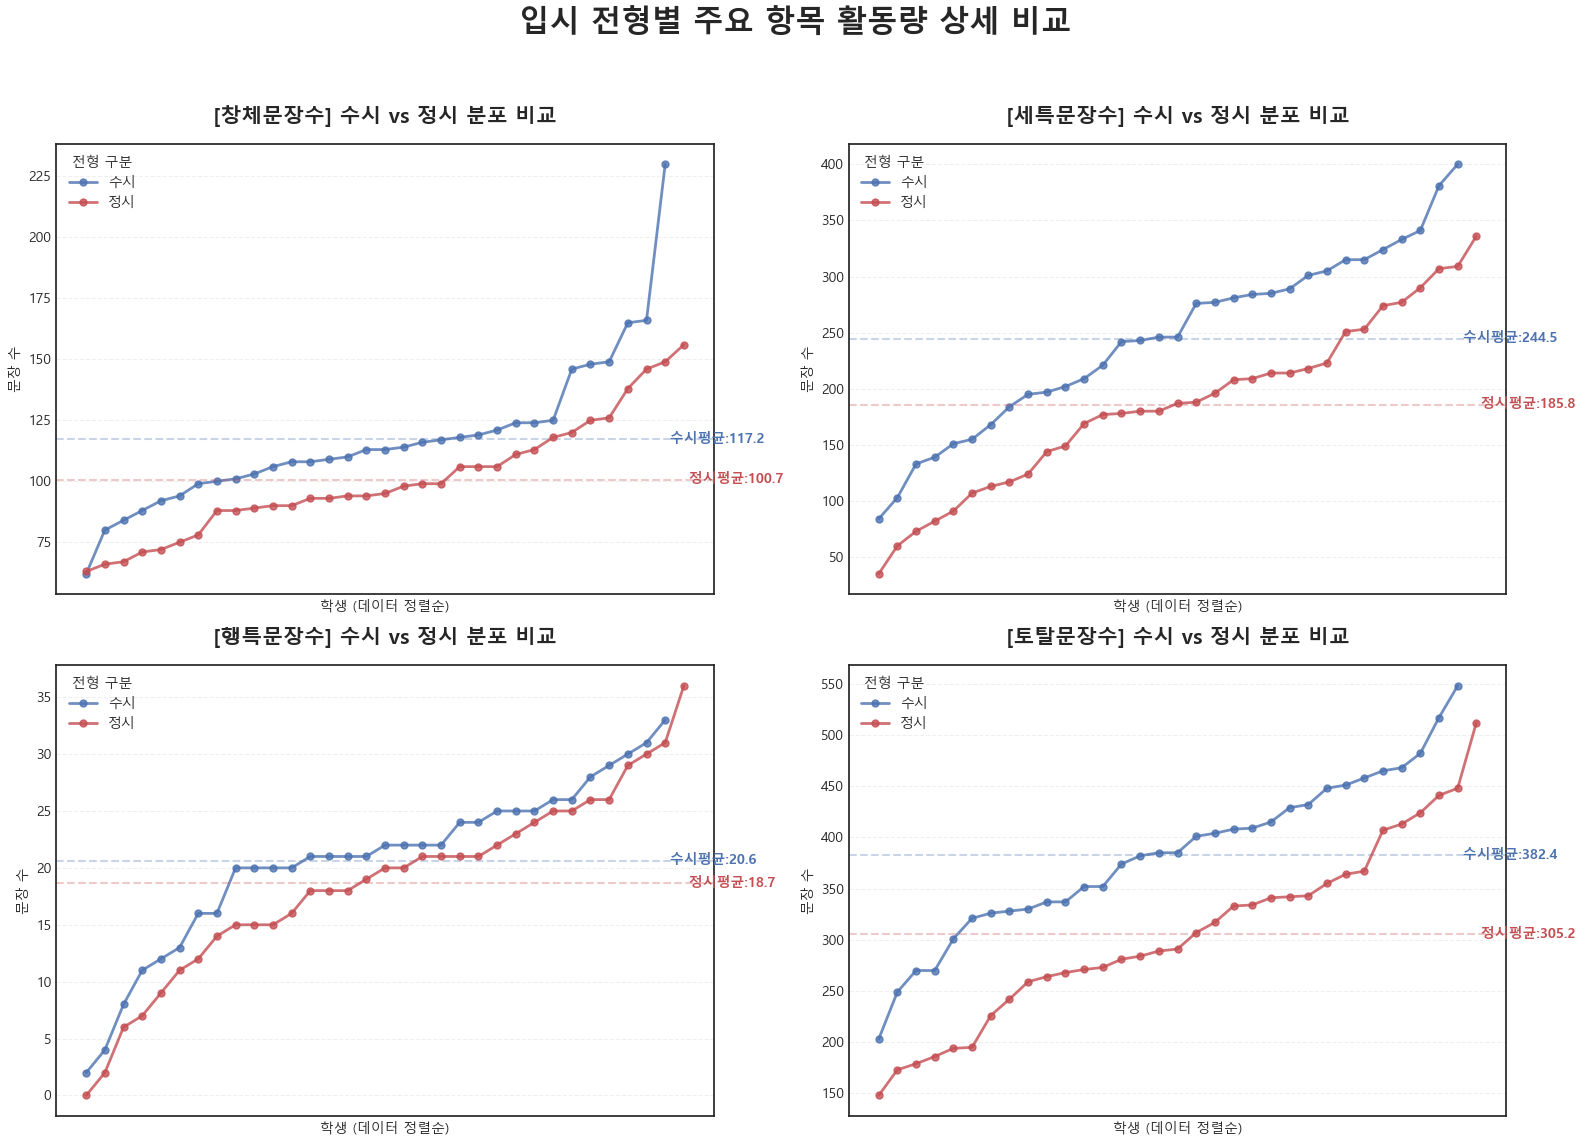

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 1. 한글 및 스타일 설정
plt.style.use('seaborn-v0_8-white')
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

# 2. 데이터 불러오기 및 병합
file_main = '세특문장수.xlsx'   # 학생이름, 창체, 세특, 행특, 토탈 포함
file_info = '세특문장수_수시정시_구분.xlsx' # 학생이름, 전형 포함

df_main = pd.read_excel(file_main)
df_info = pd.read_excel(file_info)

# 데이터 정제 및 병합
df_main.columns = df_main.columns.str.strip()
df_info.columns = df_info.columns.str.strip()
df_main['학생이름'] = df_main['학생이름'].astype(str).str.strip()
df_info['학생이름'] = df_info['학생이름'].astype(str).str.strip()

df = pd.merge(df_main, df_info[['학생이름', '전형']], on='학생이름', how='inner')
df = df[df['전형'].isin(['수시', '정시'])]

# 3. 그래프 그리기 (2행 2열 격자)
plot_cols = ['창체문장수', '세특문장수', '행특문장수', '토탈문장수']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# 전형별 고정 색상
colors = {"수시": "#4C72B0", "정시": "#C44E52"}

for i, col in enumerate(plot_cols):
    ax = axes[i]
    
    # [핵심] 전형별로 데이터를 나누어 선 그래프 그리기
    for label, color in colors.items():
        subset = df[df['전형'] == label][col].sort_values().reset_index(drop=True)
        ax.plot(subset.index, subset.values, marker='o', label=label, 
                color=color, linewidth=2, markersize=5, alpha=0.8)
        
        # 각 선의 마지막 지점에 평균값 표시 (선택 사항)
        avg_val = subset.mean()
        ax.axhline(avg_val, color=color, linestyle='--', alpha=0.3) # 평균 점선
        ax.text(len(subset)-1, avg_val, f' {label}평균:{avg_val:.1f}', 
                color=color, va='center', fontweight='bold')

    ax.set_title(f'[{col}] 수시 vs 정시 분포 비교', fontsize=15, fontweight='bold', pad=15)
    ax.set_ylabel('문장 수')
    ax.set_xlabel('학생 (데이터 정렬순)')
    ax.set_xticks([]) # 개별 이름 숨기기
    ax.legend(title='전형 구분')
    ax.grid(True, linestyle='--', alpha=0.3)

plt.suptitle('입시 전형별 주요 항목 활동량 상세 비교', fontsize=22, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [2]:
# 1. 한글 및 스타일 설정
plt.style.use('seaborn-v0_8-white')
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

# 2. 데이터 불러오기 및 병합
file_main = '세특문장수.xlsx'   
file_info = '세특문장수_수시정시_구분.xlsx' 

df_main = pd.read_excel(file_main)
df_info = pd.read_excel(file_info)

# 데이터 정제 및 병합
df_main.columns = df_main.columns.str.strip()
df_info.columns = df_info.columns.str.strip()
df_main['학생이름'] = df_main['학생이름'].astype(str).str.strip()
df_info['학생이름'] = df_info['학생이름'].astype(str).str.strip()

df = pd.merge(df_main, df_info[['학생이름', '전형']], on='학생이름', how='inner')
df = df[df['전형'].isin(['수시', '정시'])]

# 숫자형 변환 및 결측치 제거
plot_cols = ['창체문장수', '세특문장수', '행특문장수', '토탈문장수']
for col in plot_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=plot_cols)

# [핵심] 하위 5% 미만의 극단적으로 적은 수치(오차값) 제외
# 각 항목별로 하위 5% 지점을 계산하여 그 이상의 데이터만 남깁니다.
for col in plot_cols:
    lower_limit = df[col].quantile(0.05) # 하위 5% 기준선
    df = df[df[col] >= lower_limit]

# 3. 그래프 그리기 (2행 2열 격자)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# 전형별 고정 색상
colors = {"수시": "#4C72B0", "정시": "#C44E52"}

for i, col in enumerate(plot_cols):
    ax = axes[i]
    
    for label, color in colors.items():
        # 데이터 정렬하여 선으로 시각화
        subset = df[df['전형'] == label][col].sort_values().reset_index(drop=True)
        ax.plot(subset.index, subset.values, marker='o', label=f'{label}', 
                color=color, linewidth=2, markersize=4, alpha=0.7)
        
        # 평균값 계산 및 표시
        avg_val = subset.mean()
        ax.axhline(avg_val, color=color, linestyle='--', alpha=0.5)
        ax.text(len(subset)*0.05, avg_val + (avg_val*0.02), f'{label} 평균: {avg_val:.1f}', 
                color=color, fontweight='bold', fontsize=10)

    ax.set_title(f'[{col}] 분포 비교 (하위 5% 이상치 제외)', fontsize=15, fontweight='bold', pad=15)
    ax.set_ylabel('문장 수')
    ax.set_xlabel('학생 (정렬 순서)')
    ax.set_xticks([]) 
    ax.legend(loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.3)

plt.suptitle('입시 전형별 주요 항목 활동량 상세 비교 (이상치 필터링 적용)', fontsize=22, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '학생별_문장수_데이터.xlsx'